## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

W0724 21:16:15.225207 10316 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 21:16:15.237183 10316 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 21:16:15.240144 10316 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
"""
Compile 模型
"""
#optimizer = keras.optimizers.Adam(lr=0.001)
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=sgd)

W0724 21:18:15.987453 10316 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0724 21:18:24.771563 10316 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0724 21:18:24.854820 10316 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.8817 - acc: 0.3246 - val_loss: 1.7795 - val_acc: 0.3629
Epoch 2/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.6524 - acc: 0.4148 - val_loss: 1.7065 - val_acc: 0.4024
Epoch 3/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.5617 - acc: 0.4460 - val_loss: 1.6332 - val_acc: 0.4291
Epoch 4/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.4982 - acc: 0.4685 - val_loss: 1.8700 - val_acc: 0.3626
Epoch 5/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.4521 - acc: 0.4847 - val_loss: 1.5839 - val_acc: 0.4340
Epoch 6/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.4032 - acc: 0.5026 - val_loss: 1.5774 - val_acc: 0.4435
Epoch 7/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.3706 - acc: 0.5138 - val_loss: 1.4289 -

50000/50000 [==============================] - 5s 97us/step - loss: 0.3202 - acc: 0.8868 - val_loss: 2.2194 - val_acc: 0.5286
Epoch 60/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.2882 - acc: 0.8989 - val_loss: 2.5625 - val_acc: 0.5044
Epoch 61/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.3015 - acc: 0.8950 - val_loss: 2.2802 - val_acc: 0.5265
Epoch 62/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.2665 - acc: 0.9070 - val_loss: 2.2906 - val_acc: 0.5294
Epoch 63/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.2657 - acc: 0.9070 - val_loss: 2.3984 - val_acc: 0.5230
Epoch 64/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.2658 - acc: 0.9058 - val_loss: 2.5321 - val_acc: 0.5274
Epoch 65/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.2528 - acc: 0.9116 - val_loss: 2.3828 - val_acc: 0.5253
Epoch 66/500
50000/50000 [=============

50000/50000 [==============================] - 4s 88us/step - loss: 0.0641 - acc: 0.9779 - val_loss: 3.5113 - val_acc: 0.5366
Epoch 118/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0859 - acc: 0.9707 - val_loss: 3.5074 - val_acc: 0.5340
Epoch 119/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.0943 - acc: 0.9662 - val_loss: 3.5033 - val_acc: 0.5342
Epoch 120/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0914 - acc: 0.9675 - val_loss: 3.6614 - val_acc: 0.5337
Epoch 121/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0888 - acc: 0.9694 - val_loss: 3.5546 - val_acc: 0.5258
Epoch 122/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0948 - acc: 0.9674 - val_loss: 3.5894 - val_acc: 0.5365
Epoch 123/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0843 - acc: 0.9718 - val_loss: 3.7579 - val_acc: 0.5204
Epoch 124/500
50000/50000 [=======

50000/50000 [==============================] - 4s 89us/step - loss: 4.7736e-04 - acc: 1.0000 - val_loss: 3.9718 - val_acc: 0.5590
Epoch 176/500
50000/50000 [==============================] - 4s 89us/step - loss: 4.6625e-04 - acc: 1.0000 - val_loss: 3.9857 - val_acc: 0.5584
Epoch 177/500
50000/50000 [==============================] - 4s 89us/step - loss: 4.3089e-04 - acc: 1.0000 - val_loss: 3.9811 - val_acc: 0.5588
Epoch 178/500
50000/50000 [==============================] - 4s 88us/step - loss: 4.2131e-04 - acc: 1.0000 - val_loss: 3.9858 - val_acc: 0.5601
Epoch 179/500
50000/50000 [==============================] - 4s 90us/step - loss: 4.1062e-04 - acc: 1.0000 - val_loss: 3.9876 - val_acc: 0.5590
Epoch 180/500
50000/50000 [==============================] - 5s 90us/step - loss: 3.9406e-04 - acc: 1.0000 - val_loss: 3.9906 - val_acc: 0.5605
Epoch 181/500
50000/50000 [==============================] - 4s 90us/step - loss: 3.8516e-04 - acc: 1.0000 - val_loss: 3.9961 - val_acc: 0.5607
Epoch 

50000/50000 [==============================] - 4s 89us/step - loss: 1.9245e-04 - acc: 1.0000 - val_loss: 4.0905 - val_acc: 0.5590
Epoch 232/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.9095e-04 - acc: 1.0000 - val_loss: 4.0913 - val_acc: 0.5587
Epoch 233/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.8922e-04 - acc: 1.0000 - val_loss: 4.0943 - val_acc: 0.5588
Epoch 234/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.8751e-04 - acc: 1.0000 - val_loss: 4.0961 - val_acc: 0.5589
Epoch 235/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.8577e-04 - acc: 1.0000 - val_loss: 4.0961 - val_acc: 0.5587
Epoch 236/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.8458e-04 - acc: 1.0000 - val_loss: 4.0976 - val_acc: 0.5587
Epoch 237/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.8338e-04 - acc: 1.0000 - val_loss: 4.0985 - val_acc: 0.5580
Epoch 

50000/50000 [==============================] - 4s 88us/step - loss: 1.3121e-04 - acc: 1.0000 - val_loss: 4.1445 - val_acc: 0.5576
Epoch 288/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.3149e-04 - acc: 1.0000 - val_loss: 4.1454 - val_acc: 0.5576
Epoch 289/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.2990e-04 - acc: 1.0000 - val_loss: 4.1465 - val_acc: 0.5574
Epoch 290/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.2969e-04 - acc: 1.0000 - val_loss: 4.1462 - val_acc: 0.5577
Epoch 291/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.2898e-04 - acc: 1.0000 - val_loss: 4.1471 - val_acc: 0.5574
Epoch 292/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.2801e-04 - acc: 1.0000 - val_loss: 4.1482 - val_acc: 0.5580
Epoch 293/500
50000/50000 [==============================] - 5s 90us/step - loss: 1.2746e-04 - acc: 1.0000 - val_loss: 4.1486 - val_acc: 0.5579
Epoch 

Epoch 344/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.0154e-04 - acc: 1.0000 - val_loss: 4.1834 - val_acc: 0.5580
Epoch 345/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.0097e-04 - acc: 1.0000 - val_loss: 4.1845 - val_acc: 0.5587
Epoch 346/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.0059e-04 - acc: 1.0000 - val_loss: 4.1841 - val_acc: 0.5585- ETA: 1s - loss: 1.0083e-04 - acc: 1.00 - ETA: 1s - loss: 
Epoch 347/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.0026e-04 - acc: 1.0000 - val_loss: 4.1841 - val_acc: 0.5584
Epoch 348/500
50000/50000 [==============================] - 5s 90us/step - loss: 9.9614e-05 - acc: 1.0000 - val_loss: 4.1857 - val_acc: 0.5585
Epoch 349/500
50000/50000 [==============================] - 4s 89us/step - loss: 9.9442e-05 - acc: 1.0000 - val_loss: 4.1853 - val_acc: 0.5583
Epoch 350/500
50000/50000 [==============================] - 4s 90us/step - l

50000/50000 [==============================] - 4s 89us/step - loss: 8.3311e-05 - acc: 1.0000 - val_loss: 4.2122 - val_acc: 0.5586
Epoch 401/500
50000/50000 [==============================] - 4s 89us/step - loss: 8.2946e-05 - acc: 1.0000 - val_loss: 4.2126 - val_acc: 0.5582
Epoch 402/500
50000/50000 [==============================] - 4s 90us/step - loss: 8.2897e-05 - acc: 1.0000 - val_loss: 4.2128 - val_acc: 0.5587
Epoch 403/500
50000/50000 [==============================] - 4s 90us/step - loss: 8.2322e-05 - acc: 1.0000 - val_loss: 4.2135 - val_acc: 0.5585: 1s - loss: 8.341
Epoch 404/500
50000/50000 [==============================] - 4s 89us/step - loss: 8.1967e-05 - acc: 1.0000 - val_loss: 4.2154 - val_acc: 0.5586
Epoch 405/500
50000/50000 [==============================] - 4s 90us/step - loss: 8.2139e-05 - acc: 1.0000 - val_loss: 4.2143 - val_acc: 0.5583
Epoch 406/500
50000/50000 [==============================] - 4s 90us/step - loss: 8.1662e-05 - acc: 1.0000 - val_loss: 4.2152 - val_

50000/50000 [==============================] - 4s 89us/step - loss: 7.0970e-05 - acc: 1.0000 - val_loss: 4.2349 - val_acc: 0.5585
Epoch 457/500
50000/50000 [==============================] - 4s 89us/step - loss: 7.0717e-05 - acc: 1.0000 - val_loss: 4.2362 - val_acc: 0.5587
Epoch 458/500
50000/50000 [==============================] - 4s 89us/step - loss: 7.0639e-05 - acc: 1.0000 - val_loss: 4.2357 - val_acc: 0.5580
Epoch 459/500
50000/50000 [==============================] - 4s 90us/step - loss: 7.0387e-05 - acc: 1.0000 - val_loss: 4.2364 - val_acc: 0.5585
Epoch 460/500
50000/50000 [==============================] - 4s 90us/step - loss: 7.0139e-05 - acc: 1.0000 - val_loss: 4.2373 - val_acc: 0.5586
Epoch 461/500
50000/50000 [==============================] - 4s 90us/step - loss: 6.9799e-05 - acc: 1.0000 - val_loss: 4.2376 - val_acc: 0.5583
Epoch 462/500
50000/50000 [==============================] - 4s 89us/step - loss: 7.0010e-05 - acc: 1.0000 - val_loss: 4.2378 - val_acc: 0.5582
Epoch 

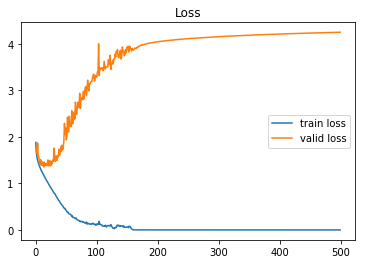

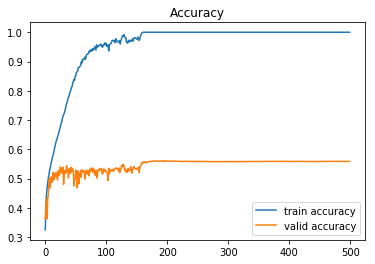

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()